In [1]:
import numpy as np
import numpy.random as rand
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import Image
from preprocessing import *

%matplotlib inline


In [2]:
def pca(X, pc=2):
    '''
    Performs PCA on X, returns a principal components that can be used to map X to lower dimension. Note: rank = min(m, n-1)
    Parameter:
        X [m, n] - data
        pc           - #of components to be returned
    Returns:
        pc principal components
    

    '''
    # demean X
    m, n = X.shape
    X = X - np.array([np.mean(X, axis=1)]).T

    # get covariance of x
    covX = np.dot(X,X.T) / len(X)

    # eigen analysis
    w, v = linalg.eig(covX)

    # remove numerical approx errors (ones near 0, ones that are negative)
    w = np.real(w)
    v = np.real(v)

    # sort by decreasing order of eigen vals
    rank = min(m, n-1)
    idx = w.argsort()[::-1]
    w = w[idx[0:rank]]
    v = v[:, idx[0:rank]]
    
    return v[:, 0:pc]

In [11]:
img = mpimg.imread('lena.png')
gray_img = rgb2gray(img)
#plt.imshow(grey_img, cmap=plt.get_cmap('gray'))

p = 16
data = extract_patches(gray_img, (p,p))




In [ ]:
n = len(data)
X = np.array(data).reshape(n, p*p).T
X = centering(X)
X = contrast_normalization(X)

In [21]:
v = pca(X, p*p)

(272, 272)


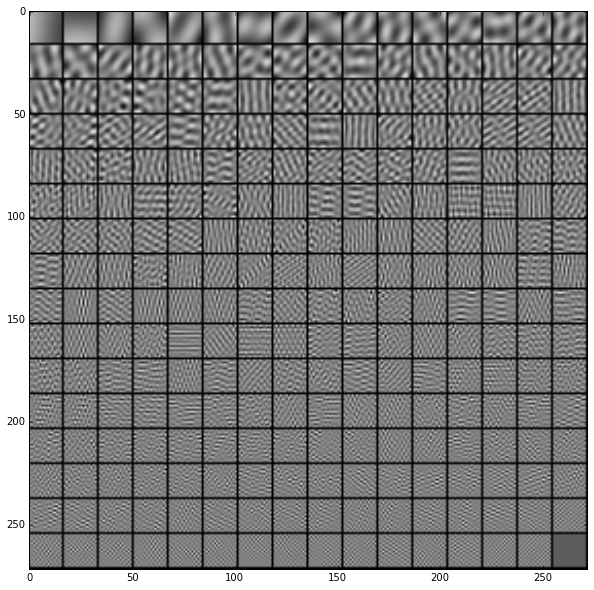

In [23]:
vis = visualise_patches(v.T.reshape(p*p,p,p) - np.min(v), (p,p), padding=True)
print vis.shape
plt.figure(figsize=(10,10))
plt.imshow(vis, cmap=plt.get_cmap('gray'))